<div id='content'></div>

## Index of Content

* [**1.0 Importing the Laibraries**](#1.0)
* [**2.0 Data Importing**](#Chapter2)
* [**3.0 Initial Exploration of the dataset**](#Chapter3)
* [**4.0 Merge Data of the dataset**](#Chapter4)
* [**5.0 Data Cleaning**](#Chapter5)
* [**6.0 Analysing Some columns**](#Chapter6)
 * [6.1 Number of althetes in Olymics](#6.1)
 * [6.2 Number of males and females](#6.2)
 * [6.3 Medal and Number of Medals in Olymics](#6.3)
 * [6.4 The cities and their number participating in the Olympics ](#6.4)
 * [6.5 Seasons in the Olympics](#6.5)
 * [6.6 Athletes Age Distribution in Olympics](#6.6)
 * [6.7 Athletes Height Distribution in Olympics](#6.7)
 * [6.8 Athletes Weight Distribution in Olympics](#6.8)
 * [6.9 Sports in Olympics](#6.9)
 * [6.10 NOC that participated in Olympics](#6.10)
 * [6.11 Regions that participated in Olympics](#6.11)
 * [6.12 Years for held Olympics](#6.12)
 * [6.13 Data describe](#6.13)
* [**7.0 Deeper Analysis**](#7.0)
 * [7.1 Number of athlete for each year](#7.1)
 * [7.2 Male VS Female for each year](#7.2)
 * [7.3 Number of each medal for each year](#7.3)
 * [7.4  Gender wise medal distribution in Summer Olympics](#7.4)
 * [7.5 Gender wise medal distribution in Winter Olympics
](#7.5)
 * [7.6 The names of the most players and how often they participated](#7.6)
 * [7.7 plots number of winners with the gold medal in each city](#7.7)
 * [7.8 plots number of winners with the Gold medal in each Year](#7.8)
 * [7.9 Sport Held in Summer Olympic](#7.9)
 * [7.10 Count of Participant in each summer sport](#7.10)
 * [7.11 Male And Female Participant in Each Winter Sport](#7.11)
 * [7.12 Top Countries in Olympic Medals](#7.12)
 * [7.13 China's Team that win Gold medal](#7.13)
 * [7.14 The Relationship Between Height and Weight by Gender](#7.14)
 * [7.15 Total number of Female athletes in each summer olympics](#7.15)
 * [7.16 Total number of Male athletes in each summer olympics](#7.16)
 * [7.17 number of athletes changed over time for Summer and Winter](#7.17)

 


<a id='1.0'></a>

## 1.0 Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv

<div id='Chapter2'></div>

## 2.0 Data Importing

In [2]:
ath = pd.read_csv("ath.csv")
reg = pd.read_csv("reg.csv")


<div id='Chapter3'></div>

## 3.0 Initial Exploration of the dataset

<div id='Chapter4'></div>

## 4.0 Merge Data of the dataset

In [3]:
df = pd.merge(ath,reg,how = 'left',on = 'NOC')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [4]:
cor = df.corr()
cor

,ID,Age,Height,Weight,Year
ID,1.000000,-0.003631,-0.011141,-0.009176,0.011885
Age,-0.003631,1.000000,0.138246,0.212069,-0.115137
Height,-0.011141,0.138246,1.000000,0.796213,0.047578
Weight,-0.009176,0.212069,0.796213,1.000000,0.019095
Year,0.011885,-0.115137,0.047578,0.019095,1.000000


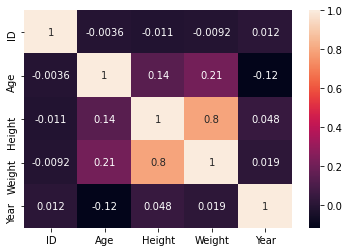

In [5]:
import seaborn as sns
sns.heatmap(cor,annot = True)

In [52]:
#sns.pairplot(df)

In [53]:
# Capitilize name of columns
df = df.rename(columns={'region':'Region', 'notes':'Notes'})
df.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,Sport,Event,Medal,Region,Notes,Miss_data,Bronze,Gold,No Medal,Silver
0,1,A Dijiang,M,24.0,180.000000,80.000000,China,CHN,1992 Summer,1992,...,Basketball,Basketball Men's Basketball,No Medal,China,No Notes,2,0,0,1,0
1,2,A Lamusi,M,23.0,170.000000,60.000000,China,CHN,2012 Summer,2012,...,Judo,Judo Men's Extra-Lightweight,No Medal,China,No Notes,2,0,0,1,0
2,3,Gunnar Nielsen Aaby,M,24.0,175.338953,70.701778,Denmark,DEN,1920 Summer,1920,...,Football,Football Men's Football,No Medal,Denmark,No Notes,4,0,0,1,0
3,4,Edgar Lindenau Aabye,M,34.0,175.338953,70.701778,Denmark/Sweden,DEN,1900 Summer,1900,...,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,No Notes,3,0,1,0,0
4,5,Christine Jacoba Aaftink,F,21.0,185.000000,82.000000,Netherlands,NED,1988 Winter,1988,...,Speed Skating,Speed Skating Women's 500 metres,No Medal,Netherlands,No Notes,2,0,0,1,0


<div id='Chapter5'></div>

## 5.0 Cleaning Data

In [54]:
# find duplicates in data
df.duplicated().sum()

0

In [55]:
# drop duplicates in data
df = df.drop_duplicates()  

In [56]:
# find count missing data
df.isnull().sum() 

ID           0
Name         0
Sex          0
Age          0
Height       0
Weight       0
Team         0
NOC          0
Games        0
Year         0
Season       0
City         0
Sport        0
Event        0
Medal        0
Region       0
Notes        0
Miss_data    0
Bronze       0
Gold         0
No Medal     0
Silver       0
dtype: int64

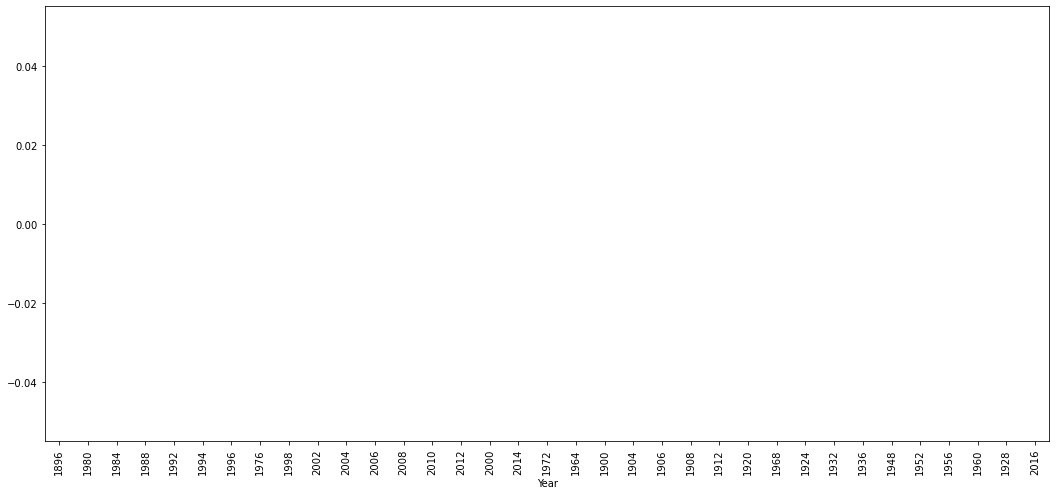

In [57]:
# plot total missing data for each year
df["Miss_data"] = df.isnull().sum(1)

n_miss_data=df.groupby(['Year'])['Miss_data'].sum().sort_values(ascending=True)
plt.figure(figsize=(18,8))
n_miss_data.plot(kind='bar', color='yellow')


In [58]:
# find the null values
df.isnull().sum()

ID           0
Name         0
Sex          0
Age          0
Height       0
Weight       0
Team         0
NOC          0
Games        0
Year         0
Season       0
City         0
Sport        0
Event        0
Medal        0
Region       0
Notes        0
Miss_data    0
Bronze       0
Gold         0
No Medal     0
Silver       0
dtype: int64

In [59]:
df['Age'].fillna((df['Age'].mean()),inplace=True)
df['Height'].fillna((df['Height'].mean()),inplace=True)
df['Weight'].fillna((df['Weight'].mean()),inplace=True)

In [60]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,Sport,Event,Medal,Region,Notes,Miss_data,Bronze,Gold,No Medal,Silver
0,1,A Dijiang,M,24.0,180.000000,80.000000,China,CHN,1992 Summer,1992,...,Basketball,Basketball Men's Basketball,No Medal,China,No Notes,0,0,0,1,0
1,2,A Lamusi,M,23.0,170.000000,60.000000,China,CHN,2012 Summer,2012,...,Judo,Judo Men's Extra-Lightweight,No Medal,China,No Notes,0,0,0,1,0
2,3,Gunnar Nielsen Aaby,M,24.0,175.338953,70.701778,Denmark,DEN,1920 Summer,1920,...,Football,Football Men's Football,No Medal,Denmark,No Notes,0,0,0,1,0
3,4,Edgar Lindenau Aabye,M,34.0,175.338953,70.701778,Denmark/Sweden,DEN,1900 Summer,1900,...,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,No Notes,0,0,1,0,0
4,5,Christine Jacoba Aaftink,F,21.0,185.000000,82.000000,Netherlands,NED,1988 Winter,1988,...,Speed Skating,Speed Skating Women's 500 metres,No Medal,Netherlands,No Notes,0,0,0,1,0


In [61]:
df['Region'].fillna(df['Team'],inplace=True)

In [62]:
df['Notes'].fillna('No Notes',inplace=True)

In [63]:
df['Medal'].fillna('No Medal',inplace =True)

In [64]:
df.isnull().sum() #no missing data

ID           0
Name         0
Sex          0
Age          0
Height       0
Weight       0
Team         0
NOC          0
Games        0
Year         0
Season       0
City         0
Sport        0
Event        0
Medal        0
Region       0
Notes        0
Miss_data    0
Bronze       0
Gold         0
No Medal     0
Silver       0
dtype: int64

In [65]:
#df.drop(columns=['B', 'C'])
#df.drop([5,6], axis=0, inplace=True) , [5,6] is the index of the rows you want to delete
#df.index[2:4] generates a range of rows from 2 to 4. The lower limit of the range is inclusive
#and the upper limit of the range is exclusive.
#This means that rows 2 and 3 will be deleted and row 4 will not be deleted.

#df.drop(df[(df['Age'] >59) & (df['Medal'] < 1)].index, inplace=True)

#https://sparkbyexamples.com/pandas/pandas-add-column-to-dataframe/#:~:text=In%20pandas%20you%20can%20add,after%20adding%20a%20new%20column.


In [66]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,Sport,Event,Medal,Region,Notes,Miss_data,Bronze,Gold,No Medal,Silver
0,1,A Dijiang,M,24.0,180.000000,80.000000,China,CHN,1992 Summer,1992,...,Basketball,Basketball Men's Basketball,No Medal,China,No Notes,0,0,0,1,0
1,2,A Lamusi,M,23.0,170.000000,60.000000,China,CHN,2012 Summer,2012,...,Judo,Judo Men's Extra-Lightweight,No Medal,China,No Notes,0,0,0,1,0
2,3,Gunnar Nielsen Aaby,M,24.0,175.338953,70.701778,Denmark,DEN,1920 Summer,1920,...,Football,Football Men's Football,No Medal,Denmark,No Notes,0,0,0,1,0
3,4,Edgar Lindenau Aabye,M,34.0,175.338953,70.701778,Denmark/Sweden,DEN,1900 Summer,1900,...,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,No Notes,0,0,1,0,0
4,5,Christine Jacoba Aaftink,F,21.0,185.000000,82.000000,Netherlands,NED,1988 Winter,1988,...,Speed Skating,Speed Skating Women's 500 metres,No Medal,Netherlands,No Notes,0,0,0,1,0


<div id='Chapter6'></div>

## 6.0 Analayzing Some columns

In [67]:
df = pd.concat([df,pd.get_dummies(df['Medal'])],axis = 1)
df


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,Notes,Miss_data,Bronze,Gold,No Medal,Silver,Bronze,Gold,No Medal,Silver
0,1,A Dijiang,M,24.0,180.000000,80.000000,China,CHN,1992 Summer,1992,...,No Notes,0,0,0,1,0,0,0,1,0
1,2,A Lamusi,M,23.0,170.000000,60.000000,China,CHN,2012 Summer,2012,...,No Notes,0,0,0,1,0,0,0,1,0
2,3,Gunnar Nielsen Aaby,M,24.0,175.338953,70.701778,Denmark,DEN,1920 Summer,1920,...,No Notes,0,0,0,1,0,0,0,1,0
3,4,Edgar Lindenau Aabye,M,34.0,175.338953,70.701778,Denmark/Sweden,DEN,1900 Summer,1900,...,No Notes,0,0,1,0,0,0,1,0,0
4,5,Christine Jacoba Aaftink,F,21.0,185.000000,82.000000,Netherlands,NED,1988 Winter,1988,...,No Notes,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.000000,89.000000,Poland-1,POL,1976 Winter,1976,...,No Notes,0,0,0,1,0,0,0,1,0
271112,135570,Piotr ya,M,27.0,176.000000,59.000000,Poland,POL,2014 Winter,2014,...,No Notes,0,0,0,1,0,0,0,1,0
271113,135570,Piotr ya,M,27.0,176.000000,59.000000,Poland,POL,2014 Winter,2014,...,No Notes,0,0,0,1,0,0,0,1,0
271114,135571,Tomasz Ireneusz ya,M,30.0,185.000000,96.000000,Poland,POL,1998 Winter,1998,...,No Notes,0,0,0,1,0,0,0,1,0


<div id='6.1'></div>

### 6.1 Number of althetes in Olymics

In [68]:
althetes_count = len(df.Name)
print('Total number of althetes in olymics:', althetes_count)

Total number of althetes in olymics: 269731


<div id='6.2'></div>

### 6.2 Number of males and females



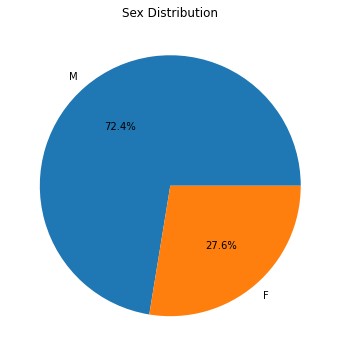

In [69]:
sex_counts = df['Sex'].value_counts()
plt.figure(figsize=(12,6))
plt.title('Sex Distribution')
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%')
plt.show()

<div id='6.3'></div>

### 6.3 Medal and Number of Medals in Olymics





In [70]:
medal_count = df['Medal'].value_counts()

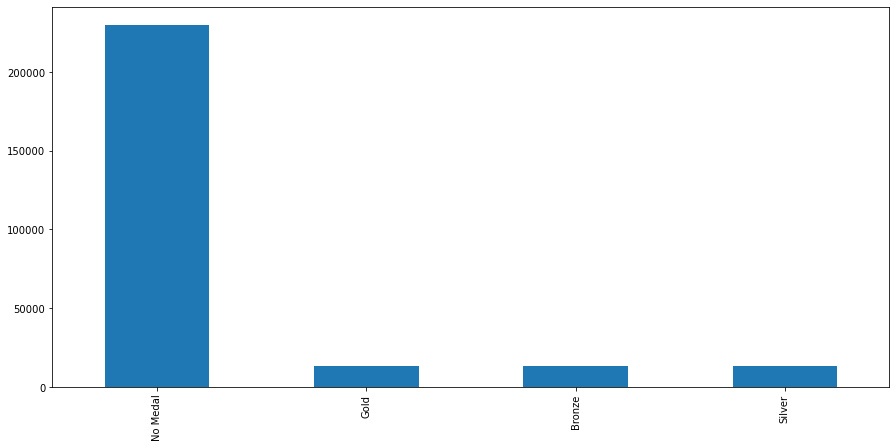

In [71]:
plt.figure(figsize=(15,7))
medal_count.plot(kind='bar');

<div id='6.4'></div>

### 6.4 The cities and their number participating in the Olympics

In [72]:
city_count, city_arr = df['City'].nunique(), df['City'].unique()
city_count, city_arr

(42,
 array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Calgary',
        'Albertville', 'Lillehammer', 'Los Angeles', 'Salt Lake City',
        'Helsinki', 'Lake Placid', 'Sydney', 'Atlanta', 'Stockholm',
        'Sochi', 'Nagano', 'Torino', 'Beijing', 'Rio de Janeiro', 'Athina',
        'Squaw Valley', 'Innsbruck', 'Sarajevo', 'Mexico City', 'Munich',
        'Seoul', 'Berlin', 'Oslo', "Cortina d'Ampezzo", 'Melbourne',
        'Roma', 'Amsterdam', 'Montreal', 'Moskva', 'Tokyo', 'Vancouver',
        'Grenoble', 'Sapporo', 'Chamonix', 'St. Louis', 'Sankt Moritz',
        'Garmisch-Partenkirchen'], dtype=object))

<div id='6.5'></div>

### 6.5 Seasons in the Olympics

In [73]:
df['Season'].unique()

array(['Summer', 'Winter'], dtype=object)

<div id='6.6'></div>

### 6.6 Athletes Age Distribution in  Olympics

(array([1.4000e+01, 2.2600e+02, 3.0370e+03, 9.2270e+03, 1.9795e+04,
        3.4417e+04, 4.2667e+04, 5.0714e+04, 3.3662e+04, 2.5459e+04,
        1.7024e+04, 1.1005e+04, 7.0700e+03, 4.4080e+03, 2.9530e+03,
        2.1080e+03, 1.5770e+03, 1.1920e+03, 7.8100e+02, 6.8600e+02,
        4.1400e+02, 3.7200e+02, 2.2300e+02, 1.7400e+02, 1.3200e+02,
        1.1500e+02, 8.1000e+01, 5.4000e+01, 4.4000e+01, 2.8000e+01,
        3.1000e+01, 2.2000e+01, 7.0000e+00, 5.0000e+00]),
 array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42,
        44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76,
        78]),
 <a list of 34 Patch objects>)

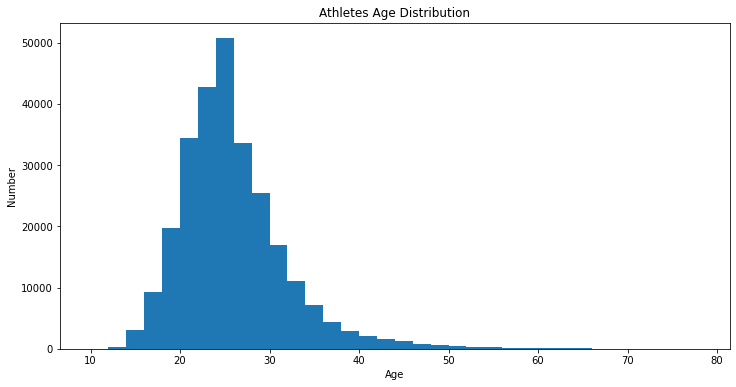

In [74]:
plt.figure(figsize=(12,6))
plt.title('Athletes Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number')
plt.hist(data=df, x='Age', bins=np.arange(10,80,2))

<div id='6.7'></div>

### 6.7 Athletes Height Distribution in  Olympics

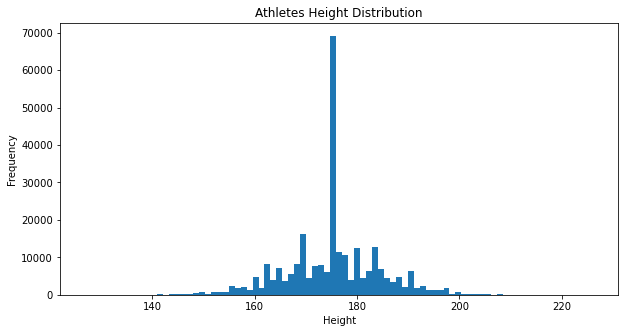

In [75]:
plt.figure(figsize = (10,5))
plt.hist(df['Height'], bins = 85)
plt.xlabel('Height')
plt.ylabel("Frequency")
plt.title("Athletes Height Distribution")
plt.show()

<div id='6.8'></div>

### 6.8 Athletes Weight Distribution in  Olympics

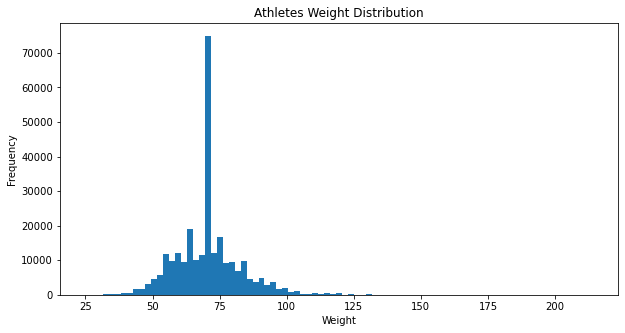

In [76]:
plt.figure(figsize = (10,5))
plt.hist(df['Weight'], bins = 85)
plt.xlabel('Weight')
plt.ylabel("Frequency")
plt.title("Athletes Weight Distribution")
plt.show()

<div id='6.9'></div>

### 6.9 Sports in  Olympics

In [77]:
df['Sport'].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Speed Skating',
       'Cross Country Skiing', 'Athletics', 'Ice Hockey', 'Swimming',
       'Badminton', 'Sailing', 'Biathlon', 'Gymnastics',
       'Art Competitions', 'Alpine Skiing', 'Handball', 'Weightlifting',
       'Wrestling', 'Luge', 'Water Polo', 'Hockey', 'Rowing', 'Bobsleigh',
       'Fencing', 'Equestrianism', 'Shooting', 'Boxing', 'Taekwondo',
       'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon',
       'Figure Skating', 'Golf', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Table Tennis', 'Nordic Combined',
       'Baseball', 'Rhythmic Gymnastics', 'Freestyle Skiing',
       'Rugby Sevens', 'Trampolining', 'Beach Volleyball', 'Triathlon',
       'Ski Jumping', 'Curling', 'Snowboarding', 'Rugby',
       'Short Track Speed Skating', 'Skeleton', 'Lacrosse', 'Polo',
       'Cricket', 'Racquets', 'Motorboating', 'Military Ski Patrol',
       'Croquet', 'Jeu De Paume', 'Roque', 'Al

<div id='6.10'></div>

### 6.10 NOC that participated in Olympics

In [78]:
df['NOC'].nunique()

230

<div id='6.11'></div>

### 6.11 Regions that participated in Olympics

In [79]:
df['Region'].unique()

array(['China', 'Denmark', 'Netherlands', 'USA', 'Finland', 'Norway',
       'Romania', 'Estonia', 'France', 'Morocco', 'Spain', 'Egypt',
       'Iran', 'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan',
       'Russia', 'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon',
       'Turkey', 'Chile', 'Mexico', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', 'Singapore', 'Uzbekistan', 'Kyrgyzstan',
       'Tajikistan', 'Japan', 'Republic of Congo', 'Switzerland',
       'Brazil', 'Monaco', 'Israel', 'Uruguay', 'Sweden',
       'Virgin Islands, US', 'Sri Lanka', 'Armenia'

<div id='6.12'></div>

### 6.12 Years for held Olympics

In [80]:
unique_years = df['Year'].unique()
unique_years = np.sort(unique_years)
unique_years

array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
       1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
       1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012,
       2014, 2016], dtype=int64)

<div id='7.0'></div>

## 7.0 Deeper Analysis

<div id='7.1'></div>

### 7.1 Number of athlete for each year

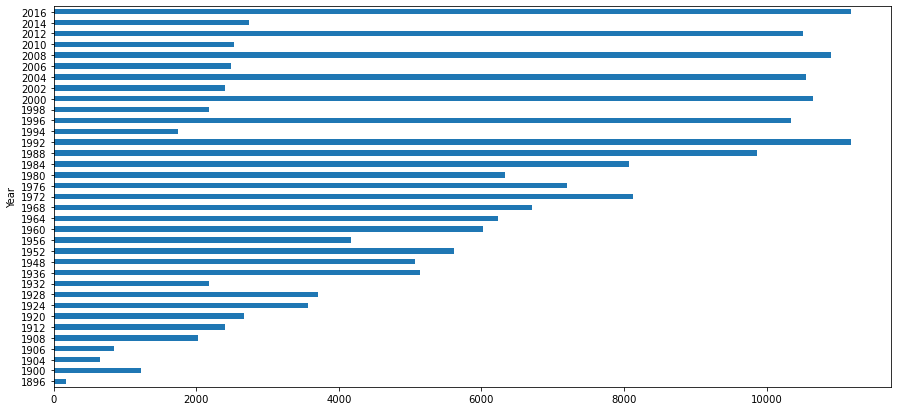

In [81]:
athlete_number = df.groupby('Year')['ID'].nunique()
plt.figure(figsize=(15,7))
athlete_number.plot(kind='barh')

<div id='7.3'></div>

### 7.3 Number of each medal for each year

In [82]:
medal_count = df.groupby(['Year' ,'Season'])['Medal'].value_counts().reset_index(name='medal_count')
medal_count

,Year,Season,Medal,medal_count
0,1896,Summer,No Medal,237
1,1896,Summer,Gold,62
2,1896,Summer,Silver,43
3,1896,Summer,Bronze,38
4,1900,Summer,No Medal,1305
...,...,...,...,...
199,2014,Winter,Silver,197
200,2016,Summer,No Medal,11665
201,2016,Summer,Bronze,703
202,2016,Summer,Gold,665


In [83]:
medal_type_count_year =pd.pivot_table(medal_count, values='medal_count', index=['Year' ,'Season'], columns=['Medal'], aggfunc=np.sum)[:10]
medal_type_count_year

Medal        Bronze  Gold  No Medal  Silver
Year Season                                
1896 Summer      38    62       237      43
1900 Summer     175   198      1305     220
1904 Summer     150   173       815     163
1906 Summer     145   157      1275     156
1908 Summer     256   294      2238     281
1912 Summer     300   326      3099     315
1920 Summer     367   493      2984     448
1924 Summer     274   277      4278     281
     Winter      37    55       330      38
1928 Summer     250   245      3922     239

<div id='7.4'></div>

### 7.4 Gender wise medal distribution in Summer Olympics

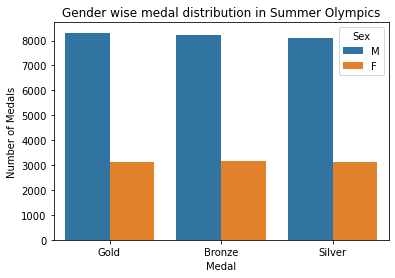

In [84]:
summer=df[df['Season']=='Summer']
summer_medal = summer[summer['Medal']!='No Medal']
sns.countplot(x='Medal',hue='Sex', data=summer_medal)
plt.xlabel('Medal')
plt.ylabel('Number of Medals')
plt.title('Gender wise medal distribution in Summer Olympics')
plt.show()

<div id='7.5'></div>

### 7.5 Gender wise medal distribution in Winter Olympics

---



<div id='7.6'></div>

### 7.6 The names of the most players and how often they participated

In [85]:
df.groupby(['Name','ID'])['ID'].count().sort_values(ascending=False)[:5].reset_index(name='Number')

,Name,ID,Number
0,Heikki Ilmari Savolainen,106296,39
1,"Joseph ""Josy"" Stoffel",115354,38
2,Ioannis Theofilakis,119591,36
3,Takashi Ono,89187,32
4,Andreas Wecker,129196,32


<div id='7.7'></div>

### 7.7 Plot number of winners with the gold medal in each city

In [86]:
gold_data = df[df['Medal'] == 'Gold']
num_c_gold= gold_data.groupby('City')['ID'].count().sort_values(ascending=False)
num_c_gold


City
London                    1215
Athina                     883
Los Angeles                726
Beijing                    671
Rio de Janeiro             665
Sydney                     663
Atlanta                    608
Barcelona                  559
Seoul                      520
Antwerpen                  493
Paris                      475
Moskva                     457
Montreal                   438
Munich                     404
Mexico City                359
Tokyo                      347
Stockholm                  338
Berlin                     312
Roma                       309
Helsinki                   306
Melbourne                  290
Amsterdam                  245
Sochi                      202
Torino                     176
Vancouver                  174
St. Louis                  173
Salt Lake City             162
Nagano                     145
Innsbruck                  131
Lillehammer                110
Lake Placid                104
Albertville                104
Cal

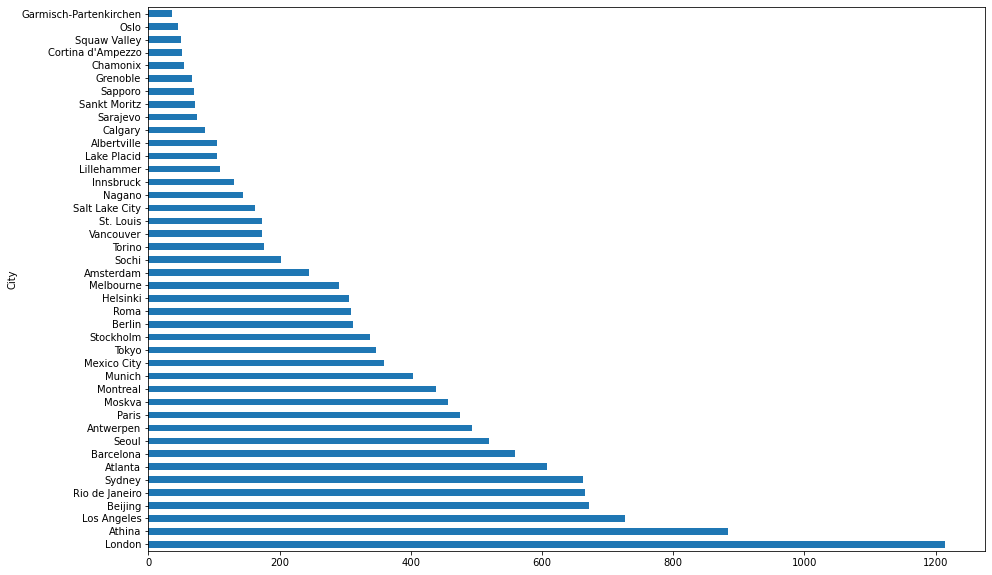

In [87]:
plt.figure(figsize=(15,10))
num_c_gold.plot(kind='barh');

<div id='7.8'></div>

### 7.8 Plot number of winners with the Gold medal in each Year

In [88]:
num_c_gold=gold_data.groupby('Year')['ID'].count().sort_values(ascending=True)
num_c_gold

Year
1896     62
1994    110
1998    145
1906    157
2002    162
1904    173
2010    174
2006    176
1900    198
2014    202
1932    261
1928    275
1908    294
1912    326
1948    330
1924    332
1936    348
1952    351
1956    353
1960    359
1964    408
1968    425
1972    474
1920    493
1976    508
1980    529
1984    571
1988    607
1996    608
2012    632
2000    663
1992    663
2004    664
2016    665
2008    671
Name: ID, dtype: int64

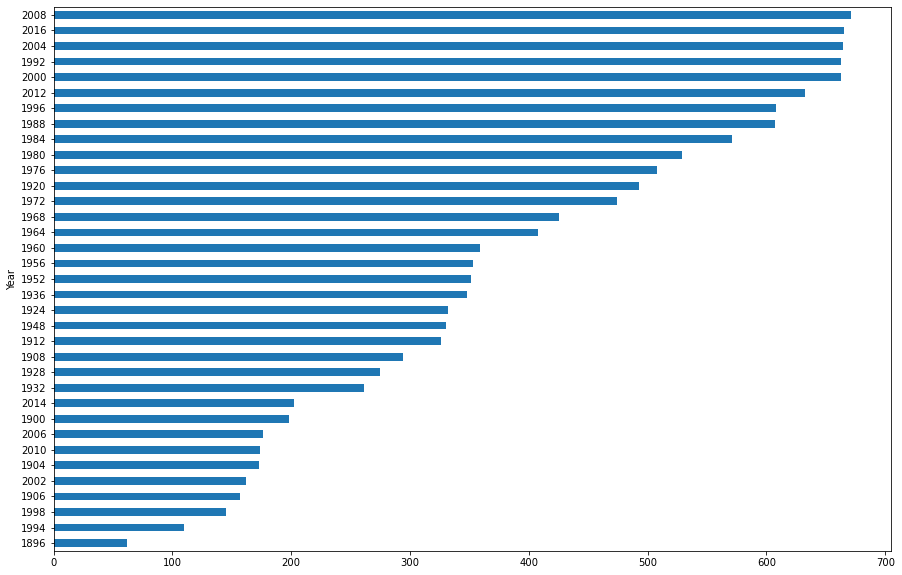

In [89]:
plt.figure(figsize=(15,10))
num_c_gold.plot(kind='barh' );

<div id='7.9'></div>

### 7.9 Sport Held in Summer Olympic

In [90]:
summer_sport_unique =df.query("Season == 'Summer'")['Sport'].unique()
summer_sport_unique

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

<div id='7.10'></div>

### 7.10 Count of Participant in each summer sport

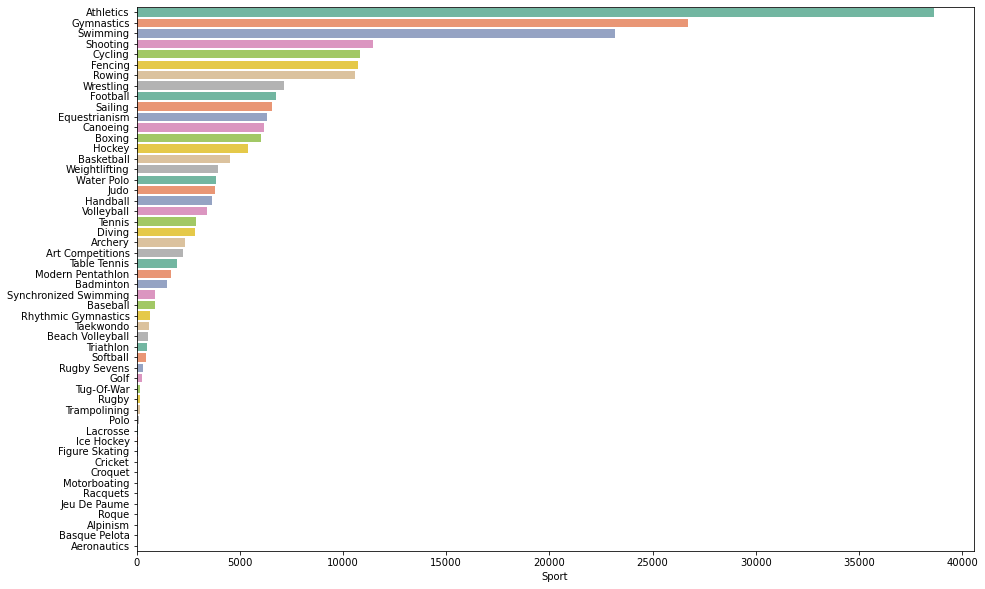

In [91]:
plt.figure(figsize=(15,10))
count_participant_summer = df.query("Season == 'Summer'")['Sport'].value_counts()
sns.barplot(x=count_participant_summer, y=count_participant_summer.index, palette = 'Set2')

<div id='7.11'></div>

### 7.11 Male And Female Participant in Each Winter Sport

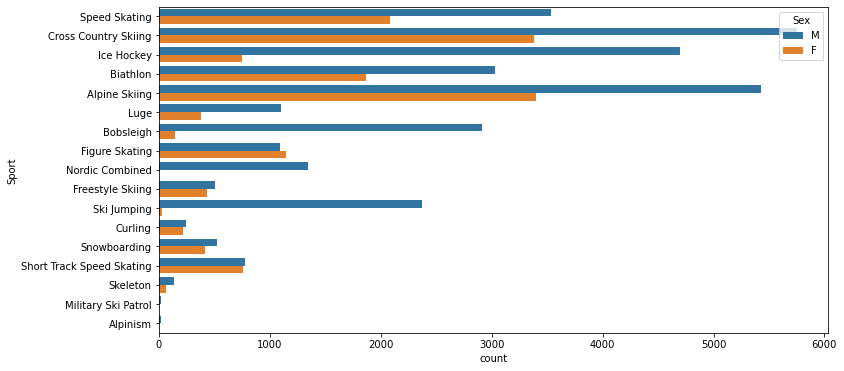

In [92]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, y = df.query("Season == 'Winter'")['Sport'], hue='Sex')

<div id='7.12'></div>

### 7.12 Top Countries in Olympic Medals

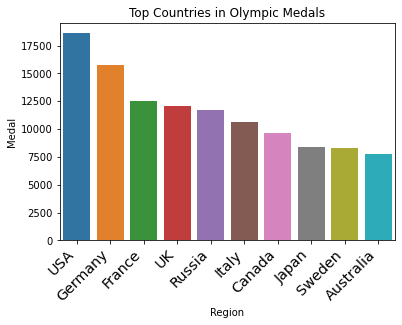

In [47]:
top_countries=df.groupby('Region')['Medal'].count().nlargest(10).reset_index()
sns.barplot('Region','Medal', data=top_countries)
plt.title('Top Countries in Olympic Medals')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()

<div id='7.14'></div>

### 7.14 The Relationship Between Height and Weight by Gender

<div id='7.15'></div>

### 7.15 Total number of Female athletes in each summer olympics

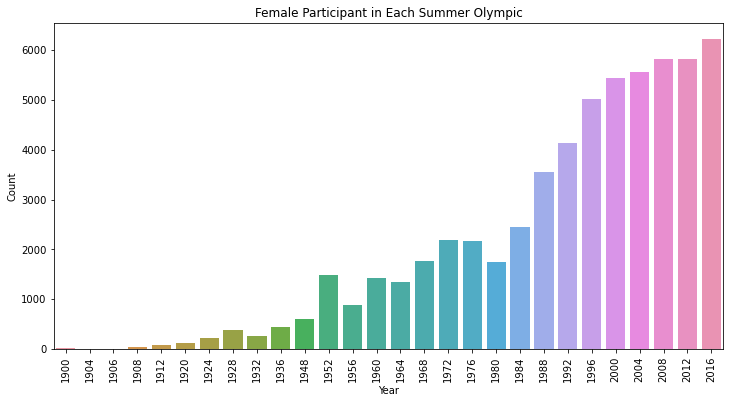

In [93]:
# Total number of Female athletes in each summer olympics
female_participant_summer = df.query("Sex == 'F' & Season == 'Summer'")[['Sex','Year']]
female_participant_summer = female_participant_summer.groupby('Year').count().reset_index()
plt.figure(figsize=(12,6))
plt.title('Female Participant in Each Summer Olympic')
plt.xticks(rotation=90)
sns.barplot(data=female_participant_summer,x='Year',y='Sex')
plt.ylabel('Count')
plt.show()

<div id='7.16'></div>

### 7.16 Total number of Male athletes in each summer olympics

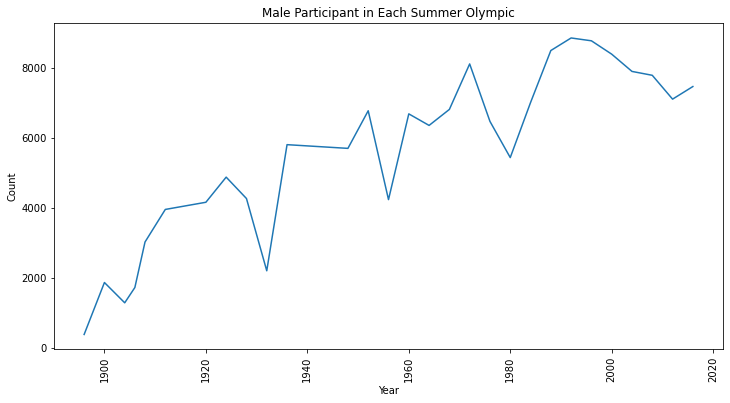

In [94]:
male_participant_summer = df.query("Sex == 'M' & Season == 'Summer'")[['Sex','Year']]
male_participant_summer = male_participant_summer.groupby('Year').count().reset_index()
plt.figure(figsize=(12,6))
plt.title('Male Participant in Each Summer Olympic')
plt.xticks(rotation=90)
sns.lineplot(data=male_participant_summer,x='Year',y='Sex')
plt.ylabel('Count')
plt.show()

<div id='7.17'></div>

### 7.17 number of athletes changed over time for Summer and Winter









In [95]:
n_athletes_over_years = df.groupby(['Year', 'Season'])['ID'].nunique().sort_index(ascending=False)
n_athletes_over_years

Year  Season
2016  Summer    11179
2014  Winter     2745
2012  Summer    10517
2010  Winter     2536
2008  Summer    10899
2006  Winter     2494
2004  Summer    10557
2002  Winter     2399
2000  Summer    10647
1998  Winter     2179
1996  Summer    10339
1994  Winter     1738
1992  Winter     1801
      Summer     9386
1988  Winter     1425
      Summer     8454
1984  Winter     1273
      Summer     6798
1980  Winter     1071
      Summer     5259
1976  Winter     1128
      Summer     6073
1972  Winter     1008
      Summer     7114
1968  Winter     1160
      Summer     5558
1964  Winter     1094
      Summer     5137
1960  Winter      665
      Summer     5352
1956  Winter      821
      Summer     3347
1952  Winter      694
      Summer     4932
1948  Winter      668
      Summer     4402
1936  Winter      668
      Summer     4484
1932  Winter      252
      Summer     1922
1928  Winter      461
      Summer     3247
1924  Winter      313
      Summer     3256
1920  Summer     26